In [1]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import itertools
from GenerateData import generate_data
import time

['Hub', 'Location2', 'Location3']
['Hub', 'Location2', 'Location3', 'Location1']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4', 'Location3']
am solution ['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4', 'Location3', 'Location2']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4', 'Location3', 'Location2']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4', 'Location3', 'Location2', 'Location1']
['Hub', 'Location2', 'Location3', 'Location1', 'Location2', 'Location4', 'Location3', 'Location2', 'Location1', 'Location3']
['Hub', 'Location2', 'Location3']
['Hub', 'Location2', 'Location3', 'Location2']
['Hub', 'Location2', 'Location3', 'Location2', 'Location1']
['Hub', 'Location2', 'Location3', 'Location2', 'Location1', 'Location4']
am solution ['Hub', 'Location2', 'Locat

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [4]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'Hub')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


TypeError: TSP.__init__() missing 1 required positional argument: 'centrality_df'

In [9]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters)
best_results

[((1000, 0.1, 10), 43.0, 2.384185791015625e-06),
 ((1000, 0.1, 20), 43.0, 2.384185791015625e-06),
 ((1000, 0.1, 40), 43.0, 2.384185791015625e-06),
 ((1000, 0.3, 20), 43.0, 2.384185791015625e-06),
 ((1000, 0.3, 40), 43.0, 2.384185791015625e-06),
 ((1000, 0.6, 20), 43.0, 2.384185791015625e-06),
 ((1000, 0.6, 40), 43.0, 2.384185791015625e-06),
 ((2000, 0.1, 10), 43.0, 2.384185791015625e-06),
 ((2000, 0.1, 20), 43.0, 2.384185791015625e-06),
 ((2000, 0.3, 20), 43.0, 2.384185791015625e-06),
 ((2000, 0.3, 40), 43.0, 2.384185791015625e-06),
 ((2000, 0.6, 40), 43.0, 2.384185791015625e-06),
 ((1000, 0.3, 10), 43.0, 2.6226043701171875e-06),
 ((1000, 0.6, 10), 43.0, 2.6226043701171875e-06),
 ((2000, 0.1, 40), 43.0, 2.6226043701171875e-06),
 ((2000, 0.3, 10), 43.0, 2.6226043701171875e-06),
 ((2000, 0.6, 10), 43.0, 2.6226043701171875e-06),
 ((2000, 0.6, 20), 43.0, 2.6226043701171875e-06),
 ((4000, 0.1, 10), 43.0, 2.6226043701171875e-06),
 ((4000, 0.1, 20), 43.0, 2.6226043701171875e-06),
 ((4000, 0.1

(1000, 0.1, 10)


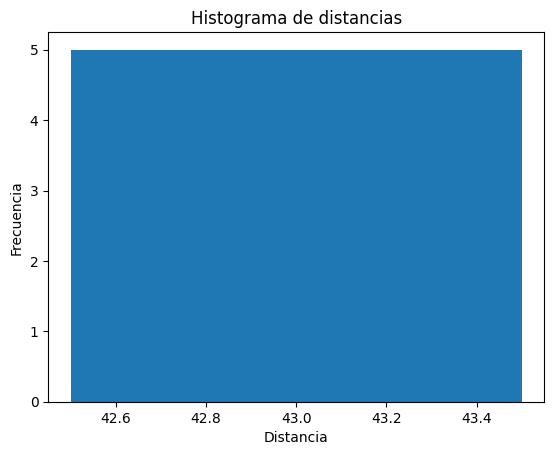

In [17]:
print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])


In [18]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [19]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'l1')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


ValueError: Sample larger than population or is negative

In [11]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=30)
best_results

[((2000, 0.1, 20), 91.0, 5.7220458984375e-06),
 ((2000, 0.1, 40), 91.0, 5.7220458984375e-06),
 ((2000, 0.3, 10), 91.0, 5.7220458984375e-06),
 ((2000, 0.6, 40), 91.0, 5.7220458984375e-06),
 ((4000, 0.1, 10), 91.0, 5.7220458984375e-06),
 ((4000, 0.1, 40), 91.0, 5.7220458984375e-06),
 ((4000, 0.3, 10), 91.0, 5.7220458984375e-06),
 ((4000, 0.3, 40), 91.0, 5.7220458984375e-06),
 ((4000, 0.6, 10), 91.0, 5.7220458984375e-06),
 ((4000, 0.6, 20), 91.0, 5.7220458984375e-06),
 ((1000, 0.1, 40), 91.0, 5.9604644775390625e-06),
 ((2000, 0.3, 20), 91.0, 5.9604644775390625e-06),
 ((2000, 0.6, 20), 91.0, 5.9604644775390625e-06),
 ((4000, 0.1, 20), 91.0, 5.9604644775390625e-06),
 ((4000, 0.3, 20), 91.0, 5.9604644775390625e-06),
 ((1000, 0.1, 10), 91.0, 6.198883056640625e-06),
 ((1000, 0.1, 20), 91.0, 6.198883056640625e-06),
 ((1000, 0.3, 10), 91.0, 6.198883056640625e-06),
 ((1000, 0.3, 20), 91.0, 6.198883056640625e-06),
 ((2000, 0.1, 10), 91.0, 6.198883056640625e-06),
 ((1000, 0.3, 40), 91.0, 6.43730163

print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])

In [13]:
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print(f"Matriz de tamaño {n}")
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño 5
67 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Matriz de tamaño 10
67 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Matriz de tamaño 20
70.1 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Matriz de tamaño 40
68 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Matriz de tamaño 60
67.1 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
